In [1]:
# @Author : Sudheeksha Garg
# @Email : sudheeksha.garg@gmail.com

import pandas as pd
import matplotlib.pyplot as plt
import datetime

#Importing the file
df = pd.read_csv('screening_exercise_orders_v201810.csv')

In [2]:
# Question A

# the most recent customer order
recent_order = df.groupby(['customer_id','gender'], sort=False)['date'].max()

# The number of orders made per customer
order_count = df['customer_id'].value_counts()

# Convert series to data frame
order_count = order_count.to_frame().reset_index()
recent_order = recent_order.to_frame().reset_index()

recent_order.columns = ['customer_id','gender','most_recent_order_date']
order_count.columns = ['customer_id','number_of_orders']

# Join the two dataframes
customer_dataframe = recent_order.join(order_count.set_index('customer_id'), on = 'customer_id')

# Result
customer_dataframe.head(10)

,customer_id,gender,most_recent_order_date,number_of_orders
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


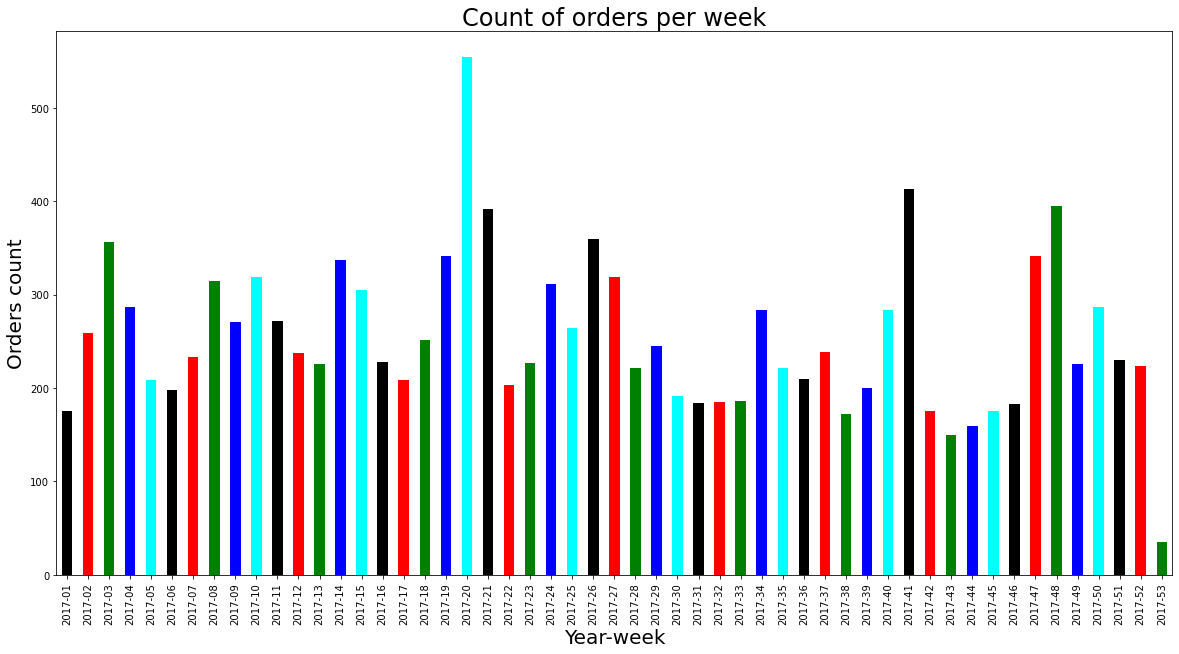

In [3]:
# Question B - Plot the count of orders per week for the store.
from matplotlib.pyplot import figure
figure(figsize=(20, 10), facecolor='w')

# Get just week year
df['date'] = pd.to_datetime(df['date'])
df['Year_Week'] = df.date.dt.strftime('%Y-%U')

orders_per_week = df.groupby(['Year_Week'])['value'].count()
orders_per_week.columns = ['Year_Week', 'orders']

ax = orders_per_week.plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Count of orders per week', fontsize=24)

plt.ylabel('Orders count', fontsize=20)
plt.xlabel('Year-week', fontsize=20)
plt.show()

In [5]:
# C - Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.
from scipy import stats
import numpy as np

print("""Using t test for comparison --> The t test compares means and tells 
you if they are different from each other. The t test also tells you how significant 
the differences are.""")

# Find the mean
gender0_mean = df.groupby('gender')['value'].mean()[0]

gender1_mean = df.groupby('gender')['value'].mean()[1]

# Find the variance
gender0_var = df.groupby('gender')['value'].var(ddof=1)[0]
gender1_var = df.groupby('gender')['value'].var(ddof=1)[1]

# Stardard Deviation
s = np.sqrt((gender0_var + gender1_var)/2)

n = (df['customer_id'].count())/2

# The calculated t statistics
t = (gender0_mean - gender1_mean)/(s*np.sqrt(2/n))
print("Calculated t-statistics value "+str(t))

# degree of freedom
f = 2*n - 2

# Critical statistics
p = 1 - stats.t.cdf(t,df=f)
p = 2*p

print("Calculated critical t-statistics value "+str(p))

if p < 0.05:
    print("""Comparing the t statistic with the critical t value 
    we get a good p value of """+str(p)+""" and thus we reject the null hypothesis 
    and thus it proves that the mean of the two distributions are different and statistically significant.""")
else:
    print("""Comparing the t statistic with 
    the critical t value we get a good p value of """+str(p)+""" and thus we accept the 
    null hypothesis and thus it proves that the mean of the two distributions are 
    different and statistically significant.""")

Using t test for comparison --> The t test compares means and tells 
you if they are different from each other. The t test also tells you how significant 
the differences are.
Calculated t-statistics value 1.9759505628067568
Calculated critical t-statistics value 0.04818075145872758
Comparing the t statistic with the critical t value 
    we get a good p value of 0.04818075145872758 and thus we reject the null hypothesis 
    and thus it proves that the mean of the two distributions are different and statistically significant.


In [7]:
# D - Generate a confusion matrix for the gender predictions of customers in this dataset. You should assume that there is only one gender prediction for each customer. 
# What does the confusion matrix tell you about the quality of the predictions?

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_true = df['gender'].to_numpy()
y_pred = np.ones(len(y_true))
cm = confusion_matrix(y_true, y_pred)
print(cm)

print(classification_report(y_true, y_pred))
print("""Meaning equal number of gender = 0 and gender = 1 values are present. 
We can also notice that recall = 1 meaning our precision of classifying genders is 
less and is biased to capturing only gender = 1 customers. We captured all gender = 1 
customers but also missed out a lot on capturing gender = 0 customers.""")

[[   0 6759]
 [   0 6712]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6759
           1       0.50      1.00      0.67      6712

    accuracy                           0.50     13471
   macro avg       0.25      0.50      0.33     13471
weighted avg       0.25      0.50      0.33     13471

Meaning equal number of gender = 0 and gender = 1 values are present. 
We can also notice that recall = 1 meaning our precision of classifying genders is 
less and is biased to capturing only gender = 1 customers. We captured all gender = 1 
customers but also missed out a lot on capturing gender = 0 customers.


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
# E - Describe one of your favorite tools or techniques and give a small example of how 
# it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.

print("""My favorite data science technique is PCA. It helps me reduce the dimension of a 
dataset and put into a scalable machine learning pipeline while retaining as 
much information as possible.""")

My favorite data science technique is PCA. It helps me reduce the dimension of a 
dataset and put into a scalable machine learning pipeline while retaining as 
much information as possible.
